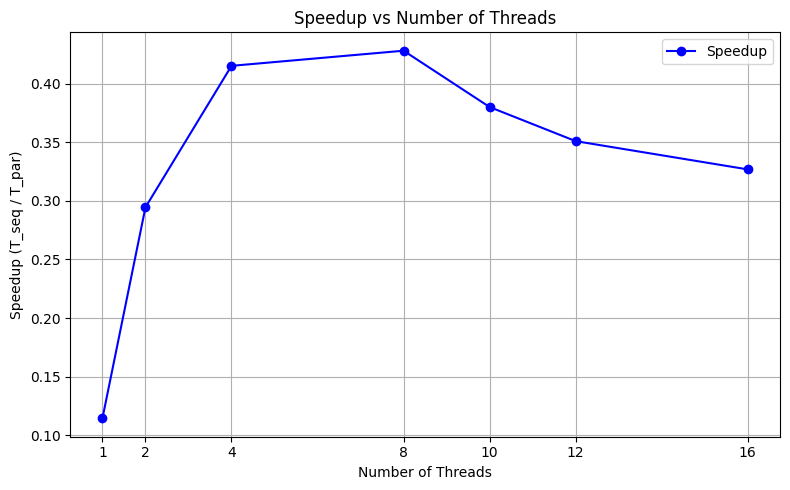

In [1]:
import matplotlib.pyplot as plt
import csv

# Load results from CSV files
# Assume you have two CSV files:
# results_sequential.csv and results_parallel.csv
# Each has columns: Algorithm,Threads,TotalColors,ExecutionTime,...

def load_times(filename):
    times = {}
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            threads = int(row['Threads'])
            time = float(row['ExecutionTime'])
            times[threads] = time
    return times

# Load sequential time (should be single-threaded, threads=1)
seq_times = load_times('/Users/anamaybrahme/VScode/Learning/Multi-Core-P-Assignments/Parallel-Graph-Colouring-for-Social-Network-Clustering-main/results_sequential.csv')
par_times = load_times('/Users/anamaybrahme/VScode/Learning/Multi-Core-P-Assignments/Parallel-Graph-Colouring-for-Social-Network-Clustering-main/results_parallel.csv')

# Get sequential time (usually with threads=1)
T_seq = seq_times.get(1)
if T_seq is None:
    raise Exception("Sequential execution time with 1 thread not found!")

# Prepare data for speedup graph
thread_counts = sorted(par_times.keys())
speedups = [T_seq / par_times[n] for n in thread_counts]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thread_counts, speedups, marker='o', linestyle='-', color='b', label='Speedup')

plt.title('Speedup vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup (T_seq / T_par)')
plt.xticks(thread_counts)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load CSV data
df = pd.read_csv('results_parallel.csv')

# You need the sequential execution time to calculate speedup.
# Replace this with your actual sequential execution time in seconds:
sequential_time = 10.0  # Example: 10 seconds for sequential

# Filter parallel rows only (ignore sequential if present)
df_parallel = df[df['Algorithm'].str.lower() == 'parallel']

# Calculate Speedup and Efficiency
df_parallel['Speedup'] = sequential_time / df_parallel['ExecutionTime']
df_parallel['Efficiency'] = df_parallel['Speedup'] / df_parallel['Threads']

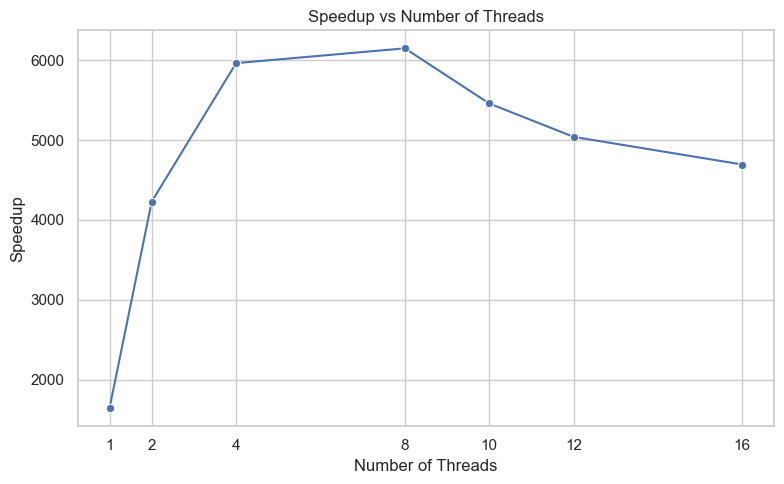

In [3]:
# Plot 1: Speedup vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='Speedup', data=df_parallel, marker='o')
plt.title('Speedup vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('speedup_vs_threads.png')

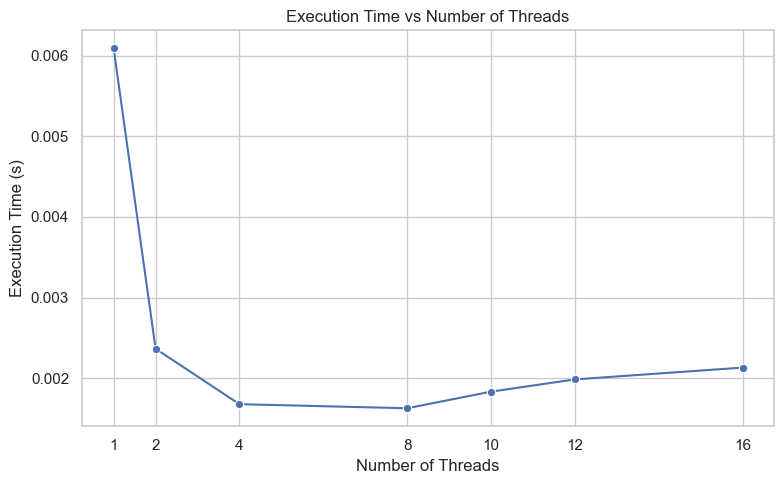

In [4]:

# Plot 2: Execution Time vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='ExecutionTime', data=df_parallel, marker='o')
plt.title('Execution Time vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('execution_time_vs_threads.png')

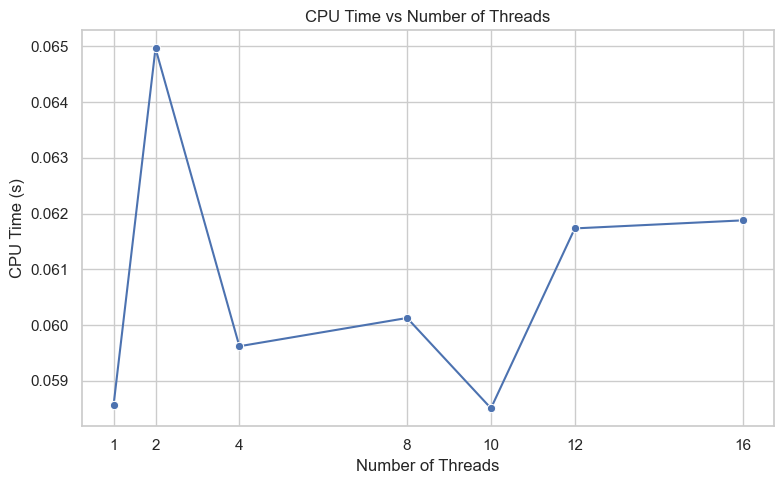

In [5]:
# Plot 3: CPU Time vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='CPUTime', data=df_parallel, marker='o')
plt.title('CPU Time vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Time (s)')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('cpu_time_vs_threads.png')

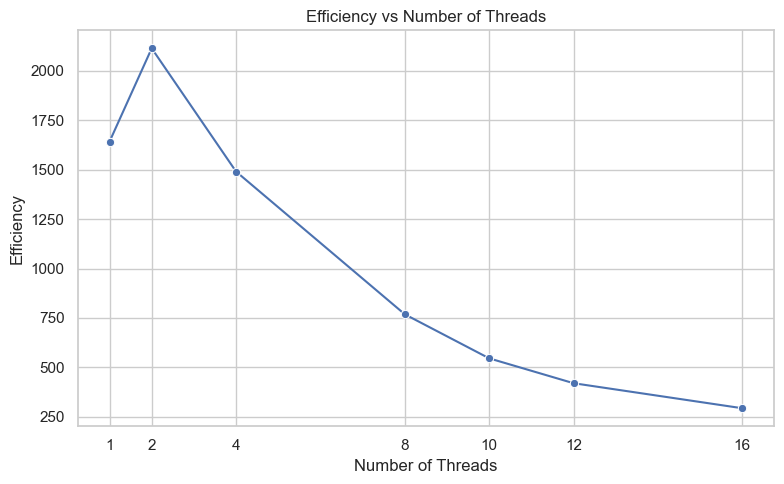

In [6]:
# Plot 4: Efficiency vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='Efficiency', data=df_parallel, marker='o')
plt.title('Efficiency vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('efficiency_vs_threads.png')

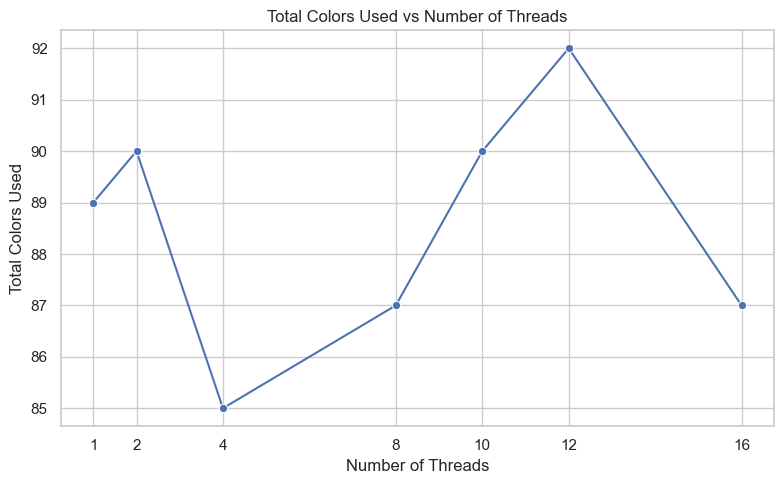

In [7]:
# Plot 5: Total Colors Used vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='TotalColors', data=df_parallel, marker='o')
plt.title('Total Colors Used vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Total Colors Used')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('total_colors_vs_threads.png')

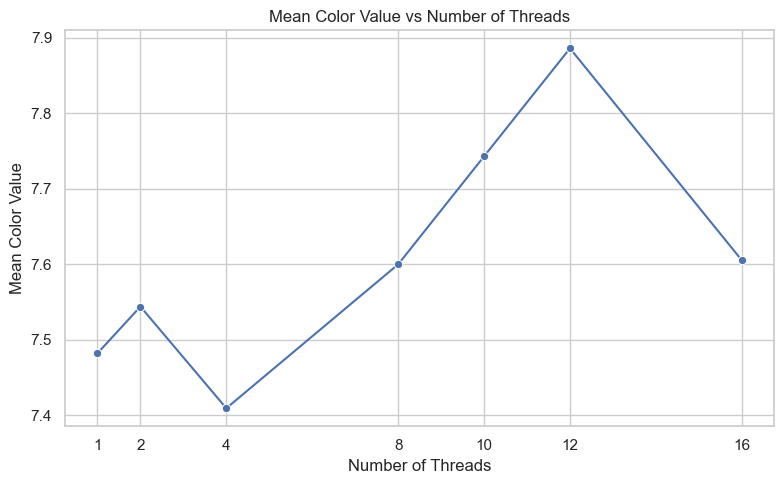

In [8]:
# Plot 6: Mean Color Value vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='MeanColor', data=df_parallel, marker='o')
plt.title('Mean Color Value vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Mean Color Value')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('mean_color_vs_threads.png')

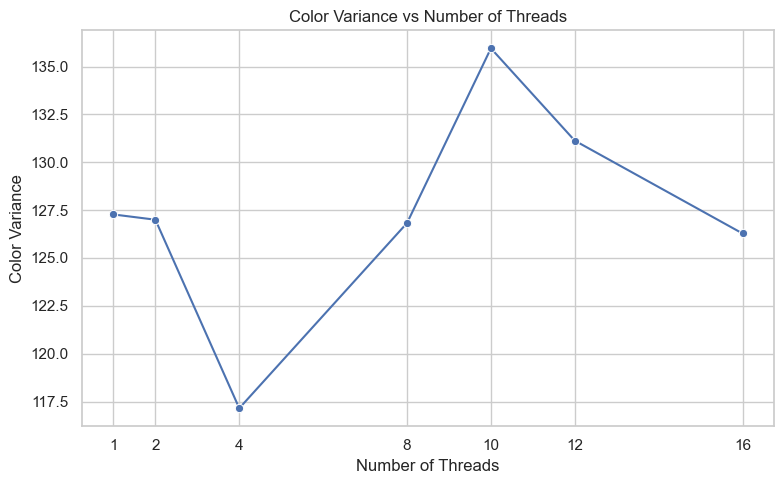

In [9]:
# Plot 7: Color Variance vs Threads
plt.figure(figsize=(8, 5))
sns.lineplot(x='Threads', y='ColorVariance', data=df_parallel, marker='o')
plt.title('Color Variance vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Color Variance')
plt.xticks(df_parallel['Threads'])
plt.grid(True)
plt.tight_layout()
plt.savefig('color_variance_vs_threads.png')

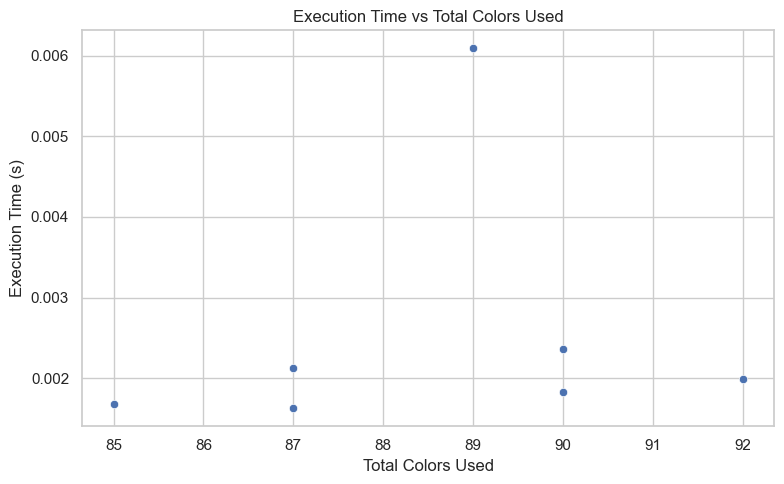

In [10]:
# Plot 8: Execution Time vs Total Colors Used (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TotalColors', y='ExecutionTime', data=df_parallel)
plt.title('Execution Time vs Total Colors Used')
plt.xlabel('Total Colors Used')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.tight_layout()
plt.savefig('execution_time_vs_total_colors.png')

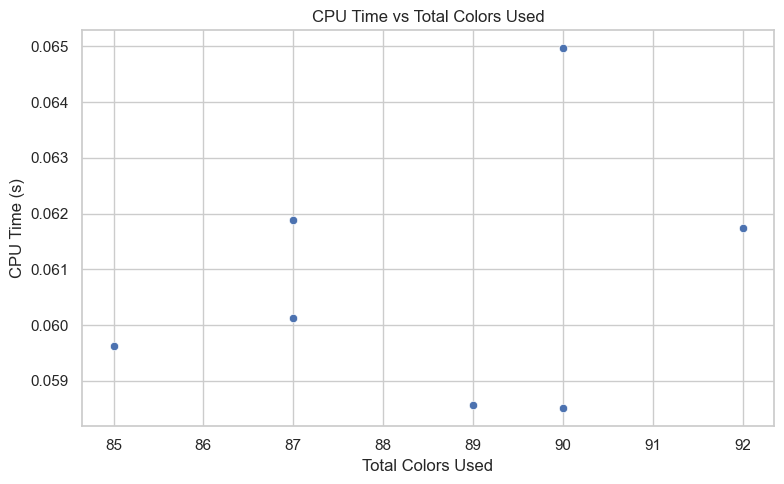

In [11]:
# Plot 9: CPU Time vs Total Colors Used (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TotalColors', y='CPUTime', data=df_parallel)
plt.title('CPU Time vs Total Colors Used')
plt.xlabel('Total Colors Used')
plt.ylabel('CPU Time (s)')
plt.grid(True)
plt.tight_layout()
plt.savefig('cpu_time_vs_total_colors.png')